FileNotFoundError: [Errno 2] No such file or directory: 'fit3.dat'

In [2]:
%matplotlib inline
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:60% !important; }</style>"))
import magbot
from magbot import *

a=coils()  
interact(coilinter,coil1_pos=widgets.FloatSlider(min=0,max=10.0,step=0.1,description='$x$ pos of coil 1:'),
         d=widgets.FloatSlider(min=0.1,value=5,max=10.0,step=0.1,description='coil 2 distance:')
         ,radius=widgets.FloatSlider(min=0.1,value=2.5,max=5.0,step=0.1,description='coil radius:'),fixed_scale=True,
         current=widgets.IntSlider(min=-100,value=10,max=100,step=1,description='current ($\mu$A):'),coil=fixed([a]));

Widget Javascript not detected.  It may not be installed or enabled properly.


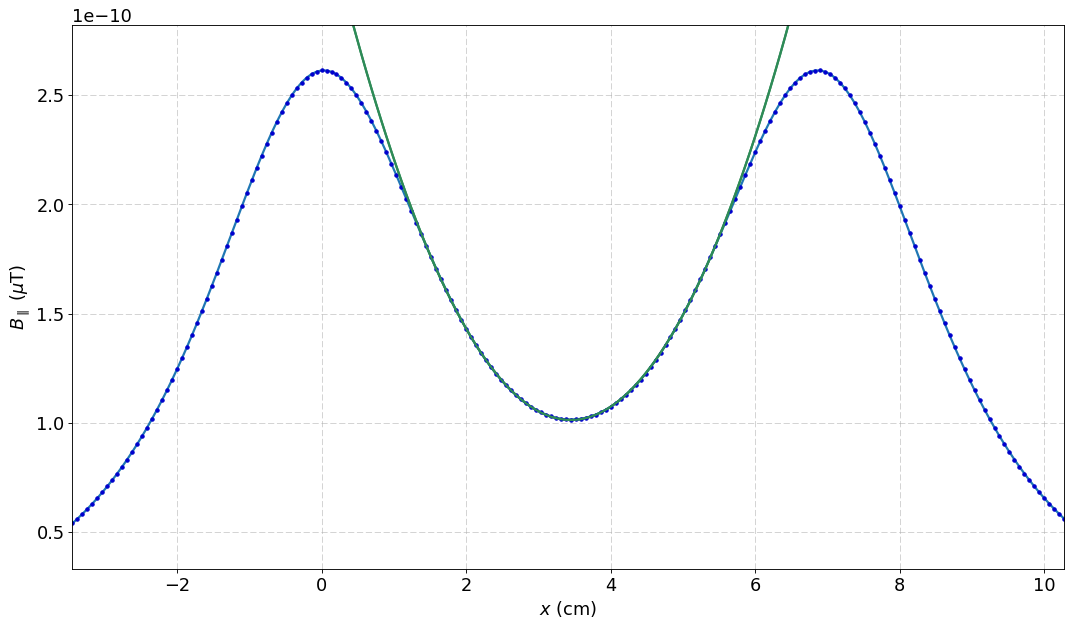

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x,a,b,c):
   return a*x*x+b*x+c


x=np.arange(a.p1+(a.p2-a.p1)/5,a.p2-(a.p2-a.p1)/5,(a.p2-a.p1)/100)
y=[a.get_Bf([xi,a.r,a.r])[0]*1e-6 for xi in x ]


popt,pcov = curve_fit(func,x/100,y)
x=np.arange(a.p1+(a.p2-a.p1)/5,a.p2-(a.p2-a.p1)/5,(a.p2-a.p1)/100)





xf=np.arange(a.p1-(a.p2-a.p1)/2,a.p2+(a.p2-a.p1)/2,(a.p2-a.p1)/100)
y=[a.get_Bf([xi,a.r,a.r])[0]*1e-6 for xi in xf ]


y_fit = popt[0]*xf*xf/10000+popt[1]*xf/100+popt[2]

fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k');
matplotlib.rcParams.update({'font.size': 16})
axes = plt.gca()
axes.set_xlim([min(xf),max(xf)])
axes.set_ylim([min(y)-(max(y)-min(y))/10,max(y)+(max(y)-min(y))/10])


axes.yaxis.get_major_formatter().set_powerlimits((0, 1))
plt.ylabel('$B_\parallel$ ($\mu$T)')
plt.xlabel('$x$ (cm)')
plt.grid(alpha=0.6,linestyle='dashed')
#plt.title("Parallel magnetic field at the axis for I="+str(self.curr)+"$\mu$A")

axes.plot(xf,y,'-',lw=2);
axes.plot(xf,y_fit,'-',lw=2,c="seagreen");

axes.plot(xf,y,'.',c='mediumblue');
axes.plot(xf,y_fit,'-',lw=2,c="seagreen");


plt.show()

In [23]:
popt[0]

1.9915457258850178e-07